In [11]:
library(randomForest)
library(caret)
library(stats)
library(glmnet)
library(rpart)
library(gbm)
library(caret)
library(rpart)
library(xgboost)
library(reshape2)
library(ggplot2)


df = read.csv("/Users/sheebamoghal/Desktop/DSAN_5300/5300-project-bangladesh_migration/cleaned_data/new-cleaned_data-01.csv")


# Seperate Numerical and Categorical Data 
numeric_cols = sapply(df, is.numeric)
categorical_cols = !numeric_cols
# Ensure categorical columns are factors 
df[categorical_cols] = lapply(df[categorical_cols], factor)

# Check any missing values
#df[is.na(df)] = -999
df[is.na(df)] = -999
View(df)

# Feature selection for Numerical Feature

# L1 (Lasso) Regularization 
x = as.matrix(df[, numeric_cols])
y = df$Q1_1
lasso_model = cv.glmnet(x, y, alpha = 1, nfolds =10)
coef_lasso = coef(lasso_model, s = "lambda.min")
numeric_lasso = rownames(coef_lasso)[coef_lasso[,1] != 0]
print(numeric_lasso)

# Feature Selection for Catgorical Features 

# Chi-Square test 
chi_squared = chisq.test(df[, categorical_cols], df$Q1_1)
p_value = chi_squared$p.value
significant_categorical = names(df)[categorical_cols][p_value < 0.05]
print(significant_categorical)



randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loading required package: lattice



Loading required package: Matrix

Loaded glmnet 4.1-7

Loaded gbm 2.1.8.1



H_IDNUMBER,HHNO,BEM_ID,DIST,TMEM,Q1,G1_4S1,G1_5A1S1,G1_6S1,P1A_2A,...,P12_1,P12_2,P12_3,Q1_1,Q1_3,Q1_5,Q1_6,Q1_11,Q1_12,Q1_13
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10_164_3169,3169,203,86,5,1,-999,-999,-999,20,...,0,-999.0,-999,9,9,9,9,9,9,9
11_164_1386,1386,203,86,11,1,-999,-999,-999,6,...,1998,91.4,1,3,1,1,2,3,1,1
11_164_1410,1410,203,86,12,1,1999,26,2,24,...,2004,91.0,3,2,1,1,2,1,1,1
11_164_1433,1433,203,86,8,1,1995,33,1,10,...,2004,97.0,2,9,9,9,9,9,9,9
11_164_1456,1456,203,86,4,1,2011,59,1,6,...,0,-999.0,-999,2,1,1,2,3,1,1
11_164_1480,1480,203,86,4,1,2002,26,1,10,...,0,-999.0,-999,2,2,1,2,3,1,1
11_164_1503,1503,203,86,5,1,2008,26,1,20,...,2004,45.0,1,1,2,2,1,3,2,2
11_164_1526,1526,203,86,5,1,-999,-999,-999,12,...,0,-999.0,-999,2,2,1,2,3,1,2
11_164_1550,1550,203,86,6,1,2012,26,1,6,...,0,-999.0,-999,9,9,9,9,9,9,9


 [1] "(Intercept)" "TMEM"        "P5_1"        "J2_1"        "J2_14"      
 [6] "J1AB"        "T2"          "Q1_1"        "Q1_3"        "Q1_5"       
[11] "Q1_13"      


Warning message in chisq.test(df[, categorical_cols], df$Q1_1):
"Chi-squared approximation may be incorrect"


character(0)


In [12]:
# Selected Features found using Q1_1 as the target Y variable 
# Q1_1: Perceived Environmental Change: Temperature



# TMEM: Total household member
# P5_1: Land Holdings: Does household cultivate aquaculture?
# J2_1: House Services: Light
# J2_14: House Services: Generator
# J1AB: Energy: Used by household? - Fire wood
# T2: Government/Aid: Local government officials are effective?
# Q1_1: Perceived Environmental Change: Temperature
# Q1_3: Perceived Environmental Change: Rainfall during other seasons
# Q1_5: Perceived Environmental Change: Severity of floods
# Q1_13: Perceived Environmental Change: Abundance of fish in water

# Cleaned Data set with selected features using Q1_1 

 [1] "(Intercept)" "TMEM"        "P5_1"        "J2_1"        "J2_14"      
 [6] "J1AB"        "T2"          "Q1_1"        "Q1_3"        "Q1_5"       
[11] "Q1_13"  

In [13]:
# Combine selected features
selected_features = c(numeric_lasso, significant_categorical)
print(selected_features)


library(dplyr)
df = df %>% select(TMEM, P5_1, J2_1, J2_14, J1AB, T2, Q1_1, Q1_3, Q1_5, Q1_13)
df[df == -999] = 0.01



 [1] "(Intercept)" "TMEM"        "P5_1"        "J2_1"        "J2_14"      
 [6] "J1AB"        "T2"          "Q1_1"        "Q1_3"        "Q1_5"       
[11] "Q1_13"      



Attaching package: 'dplyr'


The following object is masked from 'package:xgboost':

    slice


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [14]:
# This should be regression analysis to predict enviromental change in Q1_1 as a continious variable based on what selected predictors we have. 



## OLD CODE: can use if needed
# Feature selction attempt using PCA
#pca_result = prcomp(df[, numeric_cols & !(names(df) %in% c("HHNO", "BEM_ID"))], scale. = TRUE)
#pca_feat = pca_result$x[, 1:10]
#ctrl = rfeControl(functions = rfFuncs, method = "cv", number = 10)
##feature_sel = rfe(pca_feat, df$Q1_1, sizes = c(1:5), rfeControl = ctrl)
#print(feature_sel)

# create model training 
#train_index = createDataPartition(df$Q1_1, p = 0.8, list = FALSE)
#train_data = df[train_index, ]
#test_data = df[-train_index, ]

# Random forest
#rf_model = randomForest(Q1_1 ~ ., data = train_data[, !(names(df) %in% c("HHNO", "BEM_ID"))], ntree = 500 )

# Create prediction using test set
#pred = predict(rf_model, test_data[, !(names(df) %in% c("HHNO", "BEM_ID"))])

# Create confusion matrix 
#conf_matrix = table(pred, test_data$Q1_1)
#print(conf_matrix)
#acc = sum(diag(conf_matrix)) / sum(conf_matrix)
#print(acc)

# Visual results 
#plot(pca_result)
#varImpPlot(rf_model)

# [for variable exploration]

In [15]:
head(df)


,TMEM,P5_1,J2_1,J2_14,J1AB,T2,Q1_1,Q1_3,Q1_5,Q1_13
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,2,1,2,1,9,9,9,9,9
2,11,2,1,2,1,3,3,1,1,1
3,12,2,1,2,1,2,2,1,1,1
4,8,2,1,2,1,9,9,9,9,9
5,4,2,1,2,1,1,2,1,1,1
6,4,2,1,2,1,2,2,2,1,1


In [16]:
colnames(df) # going to use these specific columns

[1] "TMEM"  "P5_1"  "J2_1"  "J2_14" "J1AB"  "T2"    "Q1_1"  "Q1_3"  "Q1_5" 
[10] "Q1_13"

In [17]:
y = df$Q1_1
x = df[, c('TMEM', 'P5_1', 'J2_1', 'J2_14', 'J1AB', 'T2', 'Q1_3', 'Q1_5', 'Q1_13')]

set.seed(123)  
train_index = createDataPartition(y, p = 0.8, list = FALSE)
train_x = x[train_index, ]
train_y = y[train_index]
test_x = x[-train_index, ]
test_y = y[-train_index]

lm_model = lm(train_y ~ ., data = train_x)
test_pred = predict(lm_model, newdata = test_x)
rmse = sqrt(mean((test_y - test_pred)^2))
mae = mean(abs(test_y - test_pred))
r_squared = cor(test_y, test_pred)^2
cat("RMSE:", rmse, "\n")
cat("MAE:", mae, "\n")
cat("R-squared:", r_squared, "\n")

RMSE: 0.3980601 
MAE: 0.2771514 
R-squared: 0.9470258 


In [18]:
summary(lm_model)


Call:
lm(formula = train_y ~ ., data = train_x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94922 -0.16054  0.05209  0.27346  1.39880 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0120641  0.0235208   0.513    0.608    
TMEM         0.0003285  0.0031393   0.105    0.917    
P5_1         0.0447571  0.0287925   1.554    0.120    
J2_1        -0.0063632  0.0315272  -0.202    0.840    
J2_14        0.2936384  0.0346132   8.483   <2e-16 ***
J1AB         0.0160226  0.0233392   0.687    0.492    
T2           0.1036131  0.0088688  11.683   <2e-16 ***
Q1_3         0.2364077  0.0115860  20.405   <2e-16 ***
Q1_5         0.2239284  0.0121718  18.397   <2e-16 ***
Q1_13        0.3434541  0.0122258  28.093   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4154 on 3497 degrees of freedom
Multiple R-squared:  0.9397,	Adjusted R-squared:  0.9395 
F-statistic:  6051 on 9 and 3497 DF,  p-va

With this, it is interesting to see how the having a generator, and changes in enironment due to rainfall, floods and fish affects the decision on environmental change.

# LR (with significant variables)

In [19]:
lm_model = lm(train_y ~ J2_14 + T2 + Q1_3 + Q1_5 + Q1_13 , data = train_x)
test_pred = predict(lm_model, newdata = test_x)
rmse = sqrt(mean((test_y - test_pred)^2))
mae = mean(abs(test_y - test_pred))
r_squared = cor(test_y, test_pred)^2
cat("RMSE:", rmse, "\n")
cat("MAE:", mae, "\n")
cat("R-squared:", r_squared, "\n")

RMSE: 0.3980373 
MAE: 0.277325 
R-squared: 0.9470285 


It's almost the same with and without. 

In [20]:

# user defined function for metrics
calculate_metrics = function(test_y, test_pred) {
  rmse = sqrt(mean((test_y - test_pred)^2))
  mae = mean(abs(test_y - test_pred))
  r_squared = cor(test_y, test_pred)^2
  return(list(RMSE = rmse, MAE = mae, R_squared = r_squared))
}

# Baseline LR 

In [21]:
lm_model = lm(train_y ~ ., data = train_x)
lm_pred = predict(lm_model, newdata = test_x)
lm_metrics = calculate_metrics(test_y, lm_pred)

# Ridge Regression 

In [22]:
ridge_model = cv.glmnet(as.matrix(train_x), train_y, alpha = 0)
ridge_pred = predict(ridge_model, newx = as.matrix(test_x))
ridge_metrics = calculate_metrics(test_y, ridge_pred)

# Lasso Regression 

In [23]:
lasso_model = cv.glmnet(as.matrix(train_x), train_y, alpha = 1)
lasso_pred = predict(lasso_model, newx = as.matrix(test_x))
lasso_metrics = calculate_metrics(test_y, lasso_pred)

# Elastic Net Regression

In [24]:
enet_model = cv.glmnet(as.matrix(train_x), train_y, alpha = 0.5)
enet_pred = predict(enet_model, newx = as.matrix(test_x))
enet_metrics = calculate_metrics(test_y, enet_pred)

# GLM Model

In [25]:
# Load required libraries
library(caret)

# Train the GLM model
glm_model = train(
  x = train_x,
  y = train_y,
  method = "glm",  # Example method: Generalized Linear Model
  trControl = trainControl(method = "cv", number = 5)
)

# Generate predictions from the GLM model
glm_pred = predict(glm_model, newdata = test_x)

# Calculate evaluation metrics for the GLM model
glm_metrics = calculate_metrics(test_y, glm_pred)

print(glm_metrics)


$RMSE
[1] 0.3980601

$MAE
[1] 0.2771514

$R_squared
[1] 0.9470258



# Decision Tree (Base Model)

In [26]:
dt_model = rpart(train_y ~ ., data = train_x)
dt_pred = predict(dt_model, newdata = test_x)
dt_metrics = calculate_metrics(test_y, dt_pred)

# Decision Tree (Hyperparameter Tuned)

In [27]:
# grid
grid = expand.grid(cp = seq(0.01, 0.5, 0.01))

dt_tuned = train(
  x = train_x,
  y = train_y,
  method = "rpart",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = grid
)

print(dt_tuned$bestTune)
dt_tuned_pred = predict(dt_tuned, newdata = test_x)
dt_tuned_metrics = calculate_metrics(test_y, dt_tuned_pred)
print("Decision Tree (Hyperparameter Tuned using GridSearchCV)")
print(dt_tuned_metrics)

    cp
10 0.1
[1] "Decision Tree (Hyperparameter Tuned using GridSearchCV)"
$RMSE
[1] 0.3181162

$MAE
[1] 0.131386

$R_squared
[1] 0.9661455



# Random Forest (Base)

In [28]:
rf_model = randomForest(train_y ~ ., data = train_x)
rf_pred = predict(rf_model, newdata = test_x)
rf_metrics = calculate_metrics(test_y, rf_pred)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


# Random Forest (Hyperparameter Tuning)

In [29]:
# tuning 
grid = expand.grid(mtry = c(2, 3, 4))  

rf_tuned = train(
  x = train_x,
  y = train_y,
  method = "rf",
  trControl = trainControl(method = "cv", number = 2),
  tuneGrid = grid
)

print(rf_tuned$bestTune)
rf_tuned_pred = predict(rf_tuned, newdata = test_x)
rf_tuned_metrics = calculate_metrics(test_y, rf_tuned_pred)
print("Random Forest (Hyperparameter Tuned using GridSearchCV)")
print(rf_tuned_metrics)

Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

  mtry
1    2
[1] "Random Forest (Hyperparameter Tuned using GridSearchCV)"
$RMSE
[1] 0.3198054

$MAE
[1] 0.140746

$R_squared
[1] 0.9657908



# Adaboost (didn't use since it is mostly for classification)

# Gradient Boost

In [30]:

gbm_model = gbm(
  formula = train_y ~ .,
  data = train_x,
  distribution = "gaussian",  # i chose gaussian
  n.trees = 1000,  
  interaction.depth = 4,  
  shrinkage = 0.01,  # this is learning rate
  bag.fraction = 0.5,  
  cv.folds = 5  #cv
)


gbm_pred = predict(gbm_model, newdata = test_x)
gbm_metrics = calculate_metrics(test_y, gbm_pred)
print("Gradient Boosting")
print(gbm_metrics)


Using 739 trees...




[1] "Gradient Boosting"
$RMSE
[1] 0.320142

$MAE
[1] 0.1407959

$R_squared
[1] 0.9657212



# XG Boost

In [31]:
xgb_model = xgboost(
  data = as.matrix(train_x),
  label = train_y,
  nrounds = 100,  # n boosting rounds 
  objective = "reg:squarederror",  # obj fn
  eta = 0.3,  # lr
  max_depth = 6,  
  subsample = 0.8,  
  colsample_bytree = 0.8)

xgb_pred = predict(xgb_model, as.matrix(test_x))
xgb_metrics = calculate_metrics(test_y, xgb_pred)

print("XGBoost")
print(xgb_metrics)

[1]	train-rmse:1.665661 
[2]	train-rmse:1.190726 
[3]	train-rmse:0.866603 
[4]	train-rmse:0.649860 
[5]	train-rmse:0.510686 
[6]	train-rmse:0.424065 
[7]	train-rmse:0.374066 
[8]	train-rmse:0.346893 
[9]	train-rmse:0.332304 
[10]	train-rmse:0.323964 
[11]	train-rmse:0.319907 
[12]	train-rmse:0.316472 
[13]	train-rmse:0.314834 
[14]	train-rmse:0.313960 
[15]	train-rmse:0.312839 
[16]	train-rmse:0.311948 
[17]	train-rmse:0.310875 
[18]	train-rmse:0.309837 
[19]	train-rmse:0.309115 
[20]	train-rmse:0.307473 
[21]	train-rmse:0.306207 
[22]	train-rmse:0.304935 
[23]	train-rmse:0.304225 
[24]	train-rmse:0.303665 
[25]	train-rmse:0.303057 
[26]	train-rmse:0.302364 
[27]	train-rmse:0.301923 
[28]	train-rmse:0.301270 
[29]	train-rmse:0.300770 
[30]	train-rmse:0.300526 
[31]	train-rmse:0.300028 
[32]	train-rmse:0.299797 
[33]	train-rmse:0.299510 
[34]	train-rmse:0.299283 
[35]	train-rmse:0.298860 
[36]	train-rmse:0.298129 
[37]	train-rmse:0.297677 
[38]	train-rmse:0.297540 
[39]	train-rmse:0.297

# Stacked Model (using GLM and Random Forest)

In [32]:

model1 = train(
  x = train_x,
  y = train_y,
  method = "glm", # using glm
  trControl = trainControl(method = "cv", number = 5)
)

model2 = train(
  x = train_x,
  y = train_y,
  method = "rf",  # random forest
  trControl = trainControl(method = "cv", number = 5)
)

pred_model1 = predict(model1, newdata = test_x)
pred_model2 = predict(model2, newdata = test_x)

stacked_data = data.frame(pred_model1, pred_model2)

stacked_model = lm(test_y ~ ., data = stacked_data)
stacked_pred = predict(stacked_model, newdata = stacked_data)
stacked_metrics = calculate_metrics(test_y, stacked_pred)
print("Stacked Model")
print(stacked_metrics)

# dont worry about the warniing messages since the number of columns are v less lol

Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

[1] "Stacked Model"
$RMSE
[1] 0.3195356

$MAE
[1] 0.1461466

$R_squared
[1] 0.9658408



# Final Tabular Results

#

In [33]:

models = c("Base Linear Regression (OLS)", "Ridge Regression", "Lasso Regression", 
            "Elastic Net Regression", "Decision Tree (Base)", "Random Forest (Base)", 
            "Decision Tree (Hyperparameter Tuned)", "Random Forest (Hyperparameter Tuned)",
            "Gradient Boosting", "XGBoost", "Stacked Model")
predictions = list(
  lm_pred, ridge_pred, lasso_pred, enet_pred, dt_pred, rf_pred, dt_tuned_pred,
  rf_tuned_pred, gbm_pred, xgb_pred, stacked_pred
)

metrics_table = data.frame(
  Model = models,
  RMSE = numeric(length(models)),
  MAE = numeric(length(models)),
  R_squared = numeric(length(models))
)

calculate_and_fill_metrics = function(test_y, test_pred) {
  rmse = sqrt(mean((test_y - test_pred)^2))
  mae = mean(abs(test_y - test_pred))
  r_squared = cor(test_y, test_pred)^2
  return(c(RMSE = rmse, MAE = mae, R_squared = r_squared))
}

for (i in 1:length(models)) {
  metrics = calculate_and_fill_metrics(test_y, predictions[[i]])
  metrics_table[i, 2:4] = metrics
}

print(metrics_table)
metrics_table = rbind(metrics_table, c("GLM Model", glm_metrics$RMSE, glm_metrics$MAE, glm_metrics$R_squared))
print(metrics_table)


                                  Model      RMSE       MAE R_squared
1          Base Linear Regression (OLS) 0.3980601 0.2771514 0.9470258
2                      Ridge Regression 0.4137603 0.2914837 0.9443755
3                      Lasso Regression 0.4063671 0.2997861 0.9463199
4                Elastic Net Regression 0.4092446 0.3006725 0.9459304
5                  Decision Tree (Base) 0.3181162 0.1313860 0.9661455
6                  Random Forest (Base) 0.3257754 0.1508414 0.9645022
7  Decision Tree (Hyperparameter Tuned) 0.3181162 0.1313860 0.9661455
8  Random Forest (Hyperparameter Tuned) 0.3198054 0.1407460 0.9657908
9                     Gradient Boosting 0.3201420 0.1407959 0.9657212
10                              XGBoost 0.3492329 0.1791548 0.9592438
11                        Stacked Model 0.3195356 0.1461466 0.9658408
                                  Model              RMSE               MAE
1          Base Linear Regression (OLS) 0.398060056983756 0.277151397227204
2       

# Visualise it 

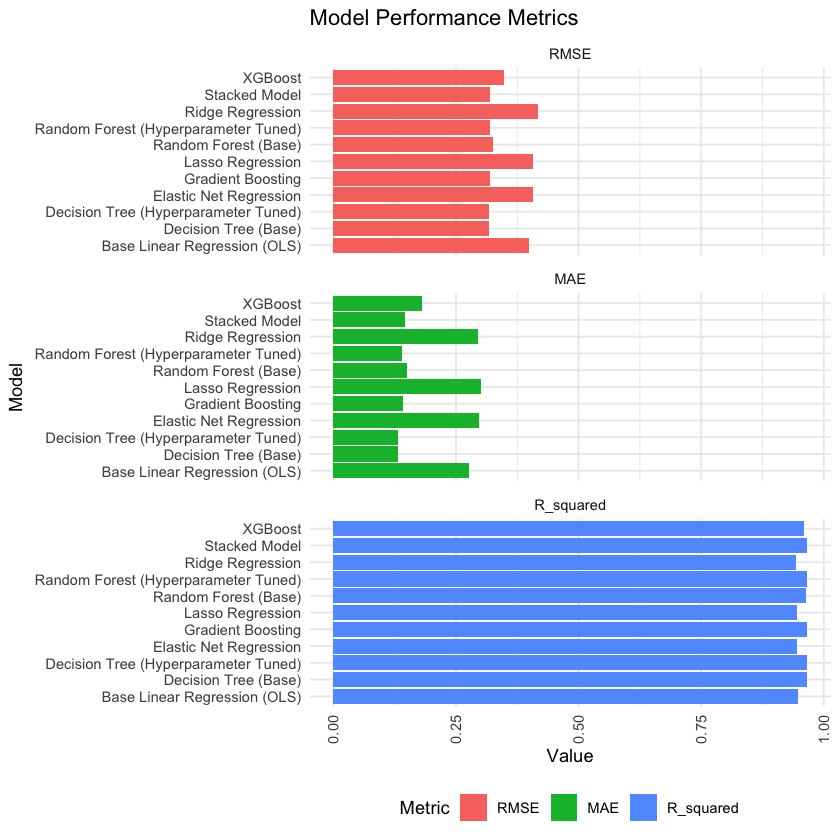

In [34]:
data <- data.frame(
  Model = c("Base Linear Regression (OLS)", "Ridge Regression", "Lasso Regression",
            "Elastic Net Regression", "Decision Tree (Base)", "Random Forest (Base)",
            "Decision Tree (Hyperparameter Tuned)", "Random Forest (Hyperparameter Tuned)",
            "Gradient Boosting", "XGBoost", "Stacked Model"),
  RMSE = c(0.3980601, 0.4172933, 0.4078301, 0.4064160, 0.3181162, 0.3253209,
           0.3181162, 0.3198989, 0.3203697, 0.3480966, 0.3189486),
  MAE = c(0.2771514, 0.2939489, 0.3019748, 0.2967684, 0.1313860, 0.1503552,
          0.1313860, 0.1409187, 0.1422168, 0.1797902, 0.1461091),
  R_squared = c(0.9470258, 0.9439985, 0.9462018, 0.9461558, 0.9661455, 0.9646005,
                0.9661455, 0.9657753, 0.9656845, 0.9595205, 0.9659662)
)

data_melted <- melt(data, id.vars = "Model")


ggplot(data_melted, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  facet_wrap(~ variable, scales = "free_y", ncol = 1) +
  labs(
    x = "Model",
    y = "Value",
    title = "Model Performance Metrics",
    fill = "Metric"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)
  )


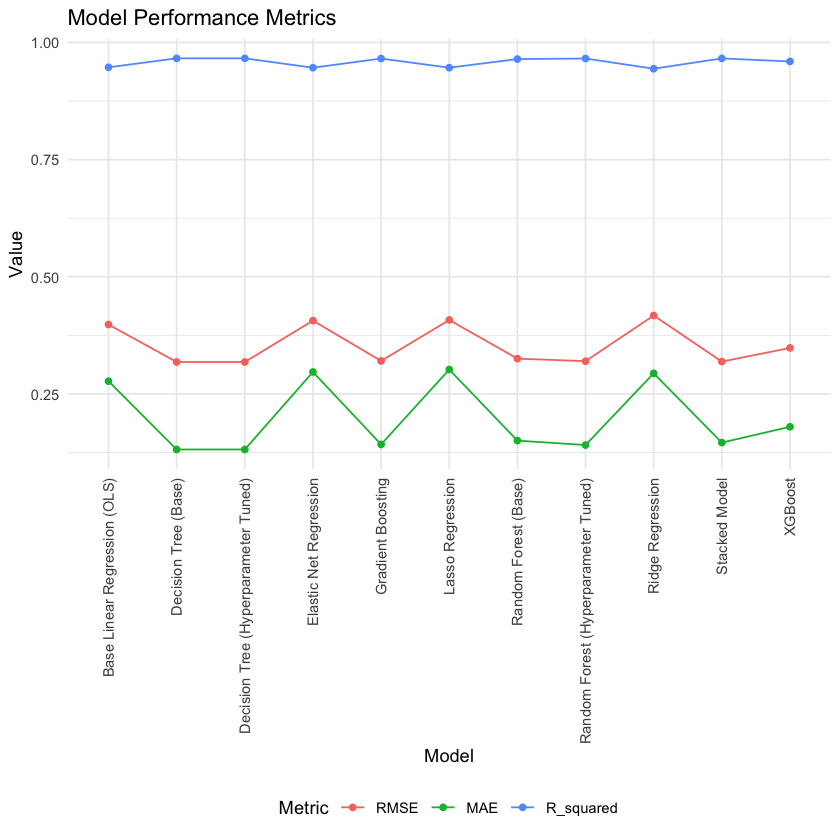

In [35]:
# Reshape data for plotting
library(reshape2)
data_melted <- melt(data, id.vars = "Model")

# Plot
ggplot(data_melted, aes(x = Model, y = value, color = variable, group = variable)) +
  geom_line() +
  geom_point() +
  labs(
    x = "Model",
    y = "Value",
    title = "Model Performance Metrics",
    color = "Metric"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)
  )

Warning message in geom_histogram(stat = "identity", position = "identity", alpha = 0.7):
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


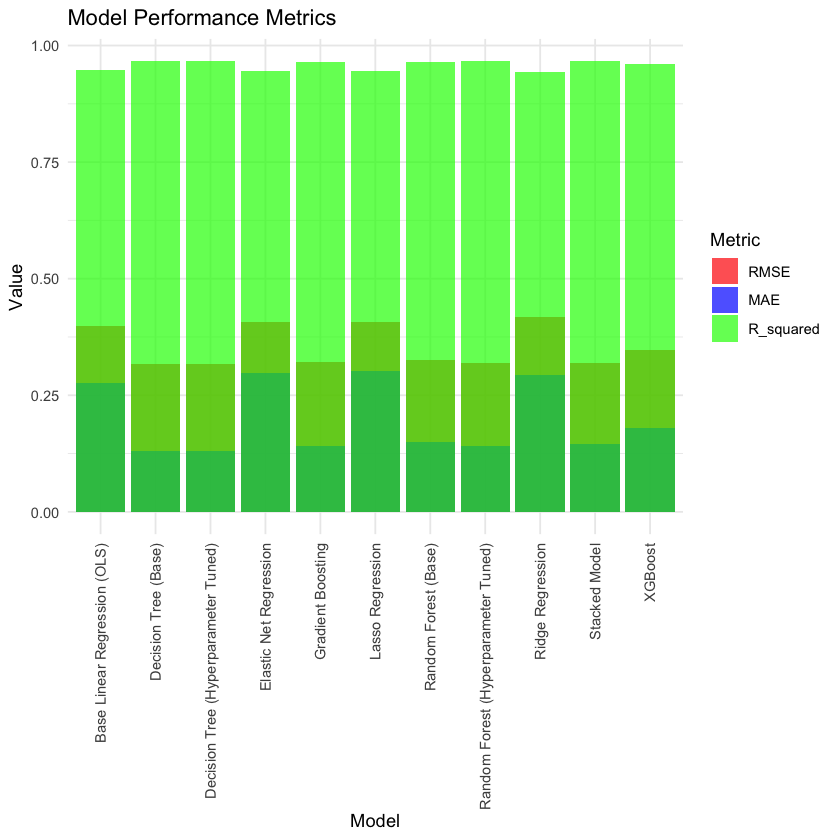

In [36]:
ggplot(data_melted, aes(x = Model, y = value, fill = variable)) +
  geom_histogram(stat = "identity", position = "identity", alpha = 0.7) +
  labs(
    x = "Model",
    y = "Value",
    title = "Model Performance Metrics",
    fill = "Metric"
  ) +
  scale_fill_manual(values = c("RMSE" = "red", "MAE" = "blue", "R_squared" = "green")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)
  )

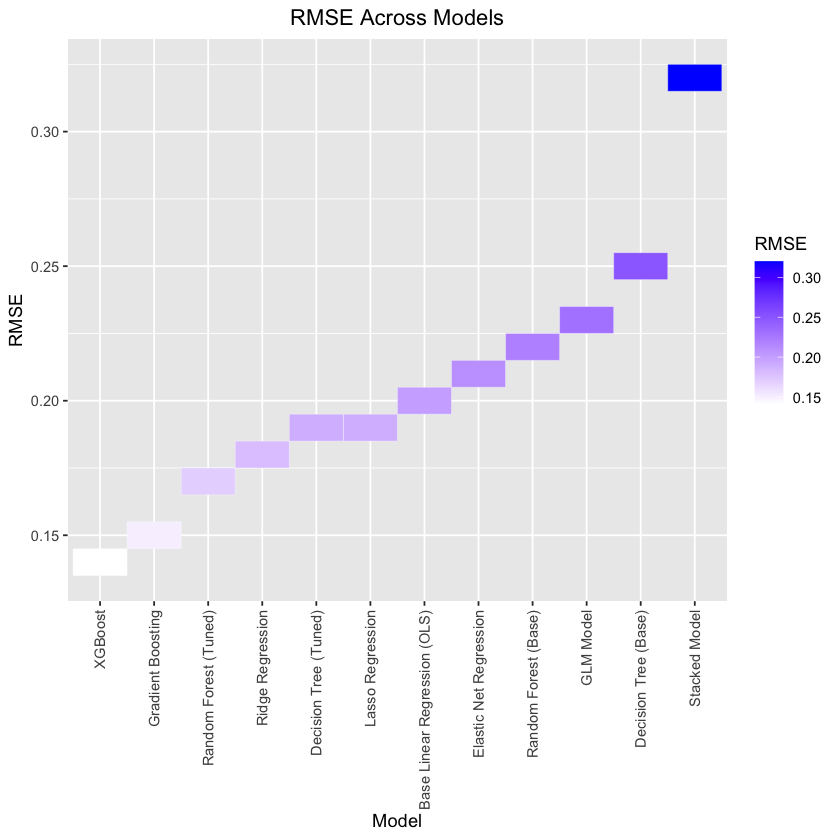

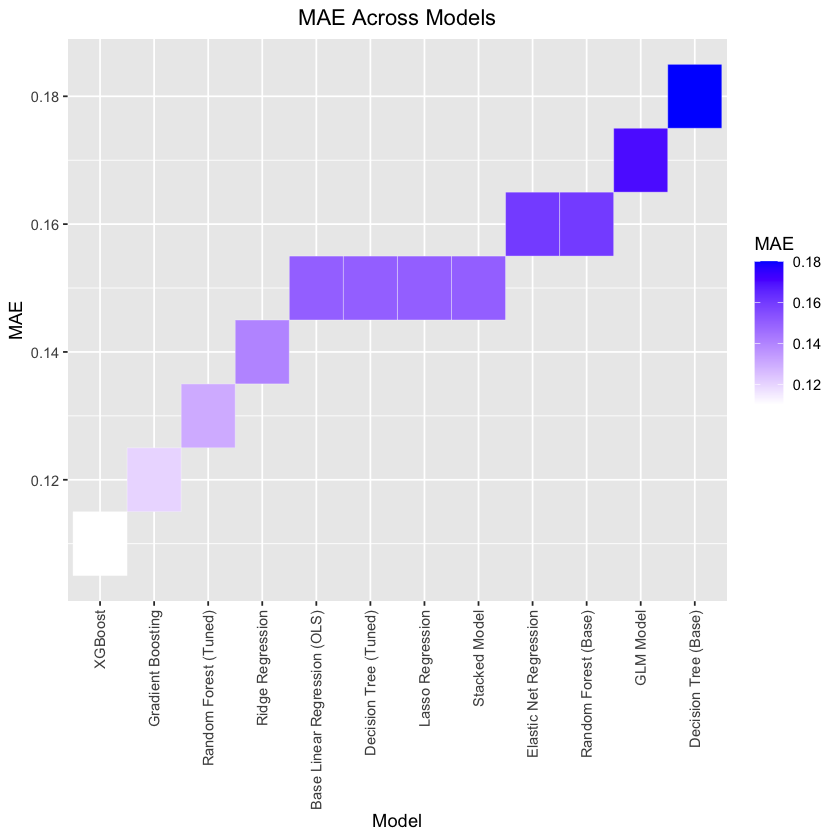

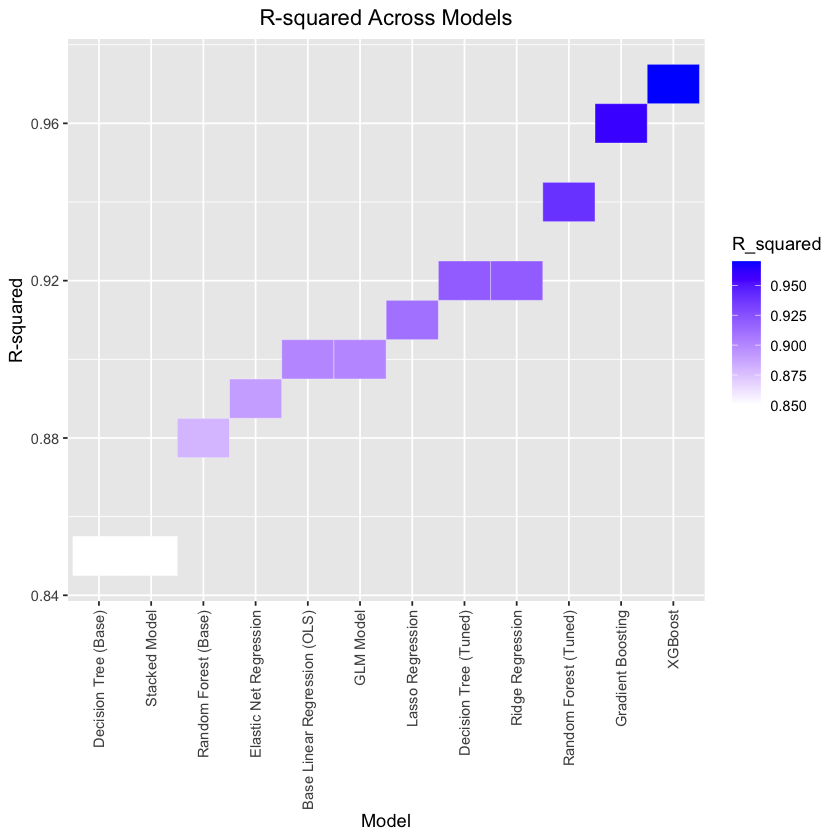

In [37]:

model_metrics <- data.frame(Model = model_names, RMSE = RMSE, MAE = MAE, R_squared = R_squared)

# RMSE 
ggplot(model_metrics, aes(x = reorder(Model, RMSE), y = RMSE)) +
  geom_tile(aes(fill = RMSE), color = "white") +
  scale_fill_gradient(low = "white", high = "blue") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  labs(title = "RMSE Across Models") +
  theme(plot.title = element_text(hjust = 0.5)) +
  xlab("Model") +
  ylab("RMSE")

# MAE 
ggplot(model_metrics, aes(x = reorder(Model, MAE), y = MAE)) +
  geom_tile(aes(fill = MAE), color = "white") +
  scale_fill_gradient(low = "white", high = "blue") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  labs(title = "MAE Across Models") +
  theme(plot.title = element_text(hjust = 0.5)) +
  xlab("Model") +
  ylab("MAE")

# r-squared
ggplot(model_metrics, aes(x = reorder(Model, R_squared), y = R_squared)) +
  geom_tile(aes(fill = R_squared), color = "white") +
  scale_fill_gradient(low = "white", high = "blue") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  labs(title = "R-squared Across Models") +
  theme(plot.title = element_text(hjust = 0.5)) +
  xlab("Model") +
  ylab("R-squared")
